# Exploratory data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/export_clean.csv')

In [4]:
df

,id_sc,pv,data,ora,tessera,r_qta_pezzi,r_peso,r_importo_lordo,r_sconto,r_sconto_rip,...,cat_mer,cod_forn,liv1,descr_liv1,liv2,descr_liv2,liv3,descr_liv3,liv4,descr_liv4
0,52597232,4542,2023-03-25,21:00:00,2.484252e+11,1,0.000000,0.78,0.47,0.10,...,1I23,868,1.0,DROGHERIA ALIMENTARE,118.0,LATTICINI UHT E ASSIMILABILI,11802.0,LATTE UHT,1180203.0,PARZIALMENTE SCREMATO
1,52597232,4542,2023-03-25,21:00:00,2.484252e+11,1,0.000000,2.64,0.35,0.35,...,5442,4474,5.0,CURA CASA,504.0,USA E GETTA,50404.0,SACCHETTI/VASCHETTE ALIMENT,5040402.0,VASCHETTE
2,52597232,4542,2023-03-25,21:00:00,2.484252e+11,1,0.000000,1.41,0.18,0.18,...,3823,5447,3.0,FRESCO,308.0,ALTRI PRODOTTI FRESCHI,30802.0,BASI,3080203.0,PASTA SFOGLIA
3,52597232,4542,2023-03-25,21:00:00,2.484252e+11,1,0.000000,1.41,0.18,0.18,...,3823,5447,3.0,FRESCO,308.0,ALTRI PRODOTTI FRESCHI,30802.0,BASI,3080203.0,PASTA SFOGLIA
4,52597232,4542,2023-03-25,21:00:00,2.484252e+11,1,0.000000,0.44,1.55,0.06,...,1F61,5543,1.0,DROGHERIA ALIMENTARE,115.0,PASTA,11506.0,PASTA ALL'UOVO,1150601.0,BRODI/MINESTRINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250572,62224004,4659,2023-09-30,21:26:00,2.484252e+11,1,0.226263,2.24,0.00,0.00,...,3642,425,3.0,FRESCO,306.0,SALUMI,30604.0,SALUMI BANCO TAGLIO,3060402.0,PROSCIUTTO COTTO
2250573,62224004,4659,2023-09-30,21:26:00,2.484252e+11,1,0.083838,0.83,0.00,0.00,...,3649,254,3.0,FRESCO,306.0,SALUMI,30604.0,SALUMI BANCO TAGLIO,3060409.0,ARROSTI
2250574,62228225,4542,2023-09-30,21:12:00,2.484252e+11,1,0.000000,0.69,0.00,0.00,...,1511,6259,1.0,DROGHERIA ALIMENTARE,105.0,"OLIO,ACETO E SUCCO DI LIMONE",10501.0,ACETO,1050101.0,STANDARD
2250575,62228225,4542,2023-09-30,21:12:00,2.484252e+11,1,0.000000,3.39,0.00,0.00,...,1142,4019,1.0,DROGHERIA ALIMENTARE,101.0,PRODOTTI FORNO E CEREALI,10104.0,BISCOTTI,1010402.0,FROLLINI ARRICCHITI


## 1. Distribution of sales by product

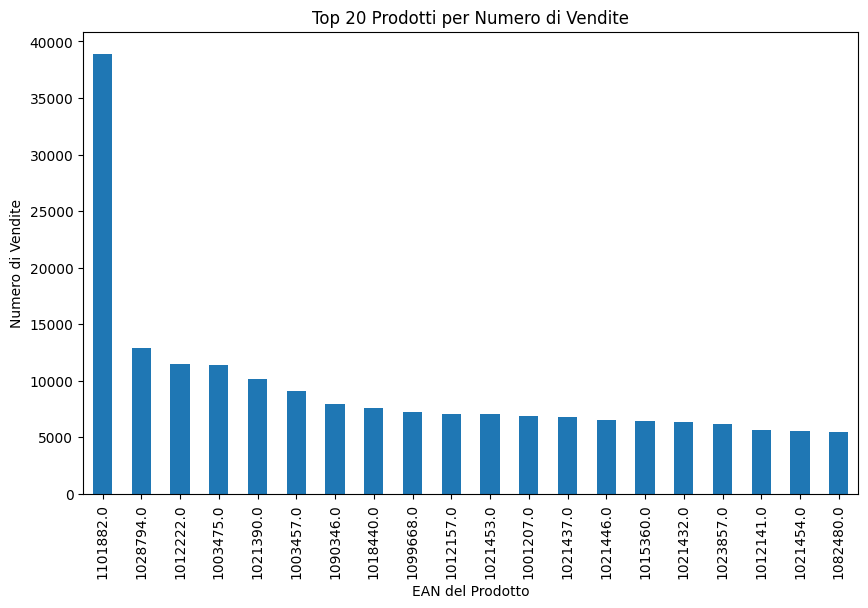

In [5]:
# Distribuzione delle vendite per prodotto (r_ean)
product_sales = df['cod_prod'].value_counts()

plt.figure(figsize=(10, 6))
product_sales.head(20).plot(kind='bar')
plt.title('Top 20 Prodotti per Numero di Vendite')
plt.xlabel('EAN del Prodotto')
plt.ylabel('Numero di Vendite')
plt.show()

## 2. Frequency of purchases per customer

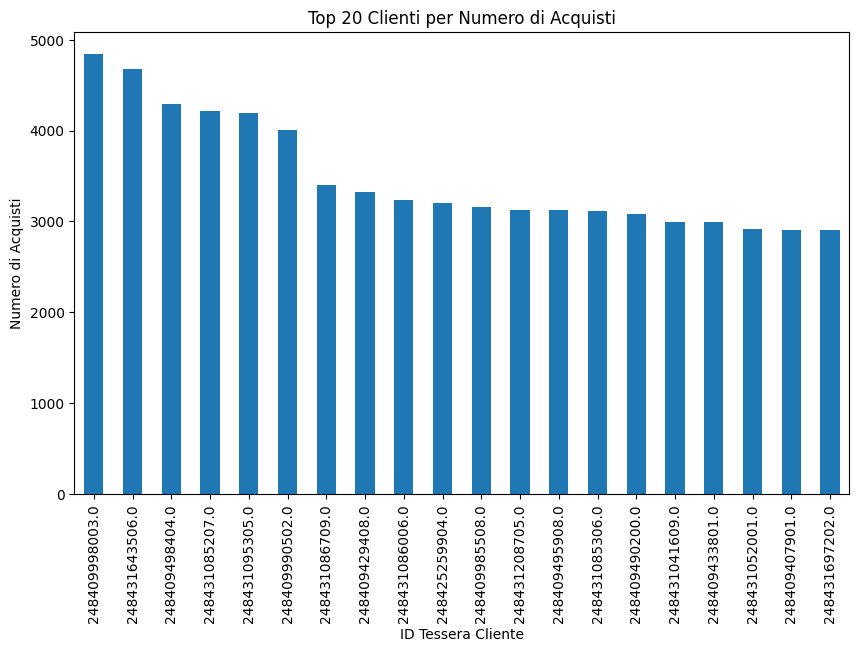

In [7]:
# Frequenza degli acquisti per cliente (tessera)
customer_frequency = df['tessera'].value_counts()

plt.figure(figsize=(10, 6))
customer_frequency.head(20).plot(kind='bar')
plt.title('Top 20 Clienti per Numero di Acquisti')
plt.xlabel('ID Tessera Cliente')
plt.ylabel('Numero di Acquisti')
plt.show()

## 4. Identification of seasonal or temporal patterns in sales

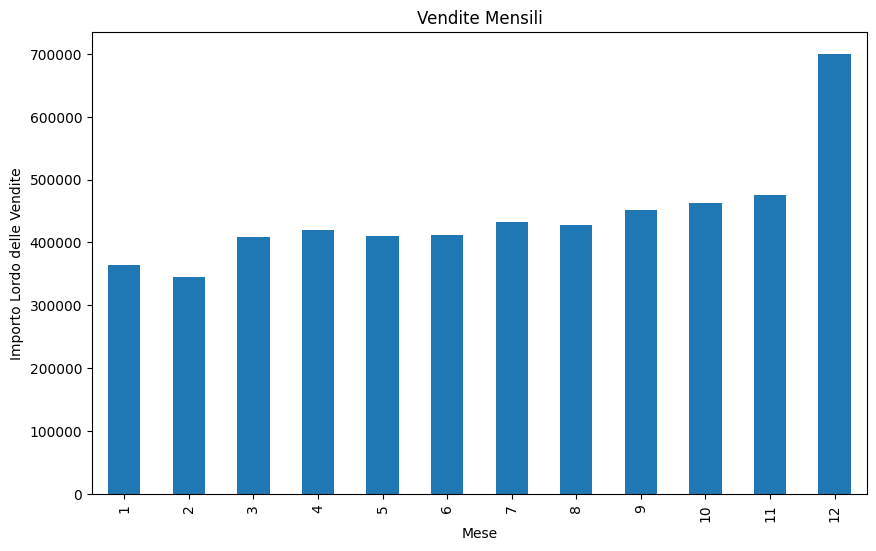

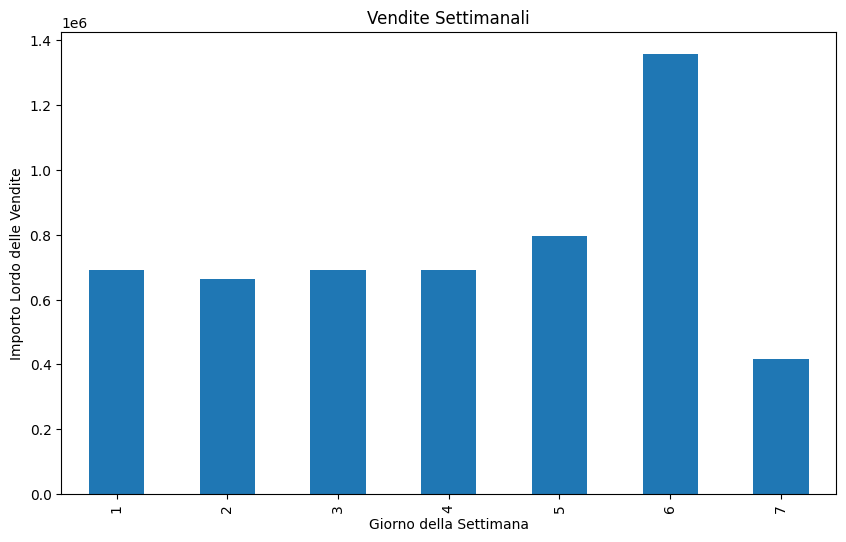

In [9]:
# Convertire la colonna 'data' in formato datetime
#df['data'] = pd.to_datetime(df['data'])

# Estrarre mese e giorno della settimana
df['month'] = df['data'].dt.month
df['day_of_week'] = df['data'].dt.dayofweek

# Pattern mensili
monthly_sales = df.groupby('month')['r_importo_lordo'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Vendite Mensili')
plt.xlabel('Mese')
plt.ylabel('Importo Lordo delle Vendite')
plt.show()

# Pattern settimanali
df['day_of_week'] = df['day_of_week'].apply(lambda x: x + 1)
weekly_sales = df.groupby('day_of_week')['r_importo_lordo'].sum()

plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='bar')
plt.title('Vendite Settimanali')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Importo Lordo delle Vendite')
plt.show()